IMPORT LIBRARIES

In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

LOAD DATASET

In [4]:
iris = pd.read_csv("C:/Users/Vrundali/Desktop/iris.csv")
iris.head


<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

RENAME THE COLUMN NAMES (IF REQUIRED)

In [5]:
iris.rename(columns = {'Id':'ID','SepalLengthCm':'SepalLength','SepalWidthCm':'SepalWidth','PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth','Species':'Species'},inplace = True)

In [6]:
iris =iris[['ID','SepalLength','SepalWidth','PetalLength','PetalWidth','Species']]
iris.head()

,ID,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


DROP ID SINCE OF NO USE (IF REQUIRED)

In [7]:
iris = iris.drop(columns =['ID'])
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


DSPLAY FINAL INFORMATION OF DATASET AFTER RENAMING AND DROPPING COLUMNS

In [8]:
iris.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


COUNT THE NUMBER OF ROWS AND THEIR CATEGORIES

In [9]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

CHECK IF ANY ROW IS EMPTY

In [10]:
iris.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

DISPLAY OVERALL DESCRIPTION OF THE DATASET

In [11]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


VISUALIZE THE DATASET USING SEABORN

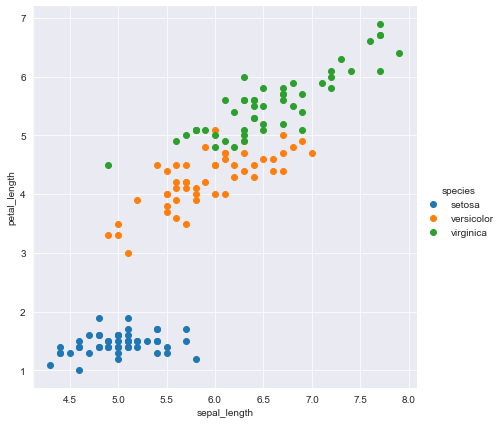

In [12]:
import seaborn as sns
 
iris = sns.load_dataset('iris')
sns.set_style("darkgrid")
 
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend()

CALCULATE THE CORRELATION BETWEEN TWO POINTS 

In [13]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


PLOT THE POINTS OF CORRELATION USING HEATMAP

<AxesSubplot:>

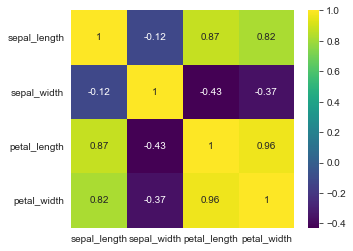

In [14]:
corr = iris.corr()
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot = True , ax=ax,cmap='viridis')

CONVERTING THE LABELS INTO NUMERIC FORM SO AS TO CONVERT IT INTO MACHINE READABLE FORM

In [15]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()

In [16]:
iris['species'] = la.fit_transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


INITIALIZE VARIABLES TO TRAIN AND TEST THE ALGORITHM WHERE TEST SIZE IS 30% AND TRAINING SIZE IS 70% 

In [17]:
x = iris.drop(columns=['species'])
y = iris['species']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30, random_state = 0)

DECLARE DECISIONTREE CLASSIFIER IN ORDER TO TRAIN THE MODEL

In [18]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
model = dc.fit(x_train,y_train)
print("Decision Tree Classifier Created")


Decision Tree Classifier Created


TEST THE MODEL AND PREDICT THE ACCURACY

In [22]:
predict = model.predict(x_test)
print("Model Accuracy: ", model.score(x_test, y_test)*100,"%")

Model Accuracy:  97.77777777777777 %


VISUALIZE THE DECISIONTREE MODEL USING SKLEARN AND MATPLOTLIB (GRAPH FORMAT)

[Text(334.8, 489.24, 'petal length (cm) <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]\nclass = Iris-virginica'),
 Text(251.10000000000002, 380.52000000000004, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(418.5, 380.52000000000004, 'petal length (cm) <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]\nclass = Iris-virginica'),
 Text(167.4, 271.8, 'petal width (cm) <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = Iris-versicolor'),
 Text(83.7, 163.08000000000004, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Iris-versicolor'),
 Text(251.10000000000002, 163.08000000000004, 'sepal width (cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(167.4, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(334.8, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(669.6, 271.8, 'petal width (cm) <= 

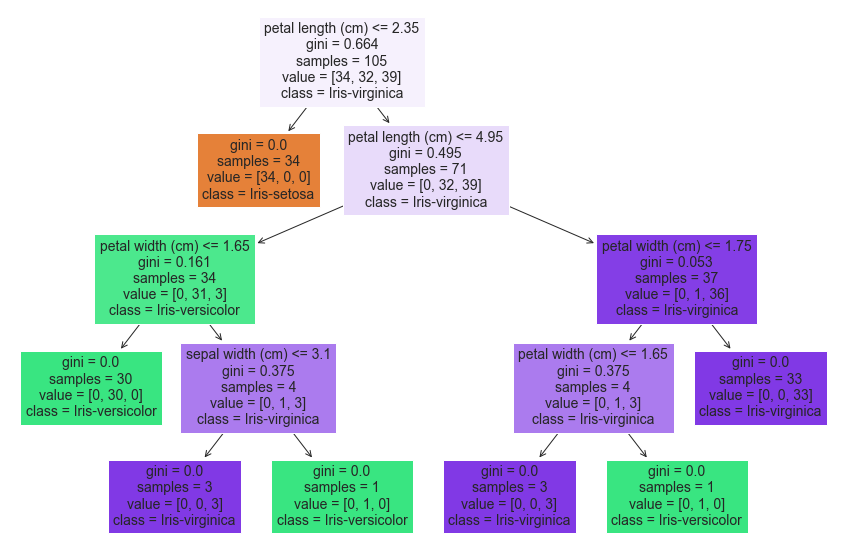

In [30]:
from sklearn import tree
name=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
type=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plt.figure(figsize=(15,10))
tree.plot_tree(model,feature_names = name ,class_names = type, filled =True )

VISUALIZATION OF ABOVE GRAPH FORMAT IN TEXT FORM OF DECISION TREE CLASSIFIER

In [31]:
print(tree.export_text(model))

|--- feature_2 <= 2.35
|   |--- class: 0
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: 2

